In [90]:
import pandas as pd
import re
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [91]:
def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url

**To refresh the dataset have to run from here**

In [92]:
# Replace with your modified URL
url = 'https://docs.google.com/spreadsheets/d/1kuoRzRyXwsCm7hNAdfG4jXhoouXhTYNAGmNI3z72KMs/edit?usp=sharing'

new_url = convert_google_sheet_url(url)

print(new_url)
# https://docs.google.com/spreadsheets/d/1mSEJtzy5L0nuIMRlY9rYdC5s899Ptu2gdMJcIalr5pg/export?gid=1606352415&format=csv

https://docs.google.com/spreadsheets/d/1kuoRzRyXwsCm7hNAdfG4jXhoouXhTYNAGmNI3z72KMs/export?format=csv


In [93]:
df = pd.read_csv(new_url)

In [94]:
column_names = df.columns
cleaned_column_names = [re.sub('\s+', ' ', name).strip() for name in column_names]

df.columns = cleaned_column_names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Inv No                67 non-null     object 
 1   Invoice Date          67 non-null     object 
 2   Customar Name         67 non-null     object 
 3   Address               67 non-null     object 
 4   Contact No            67 non-null     int64  
 5   Product               67 non-null     object 
 6   Qty                   67 non-null     int64  
 7   Per Pcs Rate          67 non-null     object 
 8   Discount              0 non-null      float64
 9   Total Amount          67 non-null     object 
 10  Payment Amount        4 non-null      object 
 11  Payment Method        4 non-null      object 
 12  Purchase Rate         67 non-null     object 
 13  Sales (ex. Discount)  67 non-null     object 
 14  Profit                67 non-null     object 
 15  Product Serial        67 

In [95]:
df.dtypes

Inv No                   object
Invoice Date             object
Customar Name            object
Address                  object
Contact No                int64
Product                  object
Qty                       int64
Per Pcs Rate             object
Discount                float64
Total Amount             object
Payment Amount           object
Payment Method           object
Purchase Rate            object
Sales (ex. Discount)     object
Profit                   object
Product Serial           object
Currier Name             object
CN Number               float64
Referance               float64
Sals Com.               float64
Remarks                 float64
Day                       int64
Month                    object
Year                      int64
dtype: object

In [96]:
df

,Inv No,Invoice Date,Customar Name,Address,Contact No,Product,Qty,Per Pcs Rate,Discount,Total Amount,...,Profit,Product Serial,Currier Name,CN Number,Referance,Sals Com.,Remarks,Day,Month,Year
0,PUS-22892024-01,10-Jan-2024,Maria Enterprize - Jindabazar,[Sylhet] Jindabazar,1718131018,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,"8,000 ৳",NaN,"32,000 ৳",...,400 ৳,"1118876, 1034393, 1036229, 1123726, 1183199",Shodagor,NaN,NaN,NaN,NaN,10,Jan,2024
1,PUS-22902024-01,11-Jan-2024,Esham Auto - Nilphamary,Nilphamary,1784072526,Microtek Merlyn 850/12V IPS+UPS,1,"9,000 ৳",NaN,"9,000 ৳",...,"1,800 ৳",81189,Shodagor,NaN,NaN,NaN,NaN,11,Jan,2024
2,PUS-22912024-01,13-Jan-2024,Maria Enterprize - Jindabazar,[Sylhet] Jindabazar,1718131018,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,"8,000 ৳",NaN,"32,000 ৳",...,400 ৳,"1083687, 1145421, 1027632, 1884892",Shodagor,NaN,NaN,NaN,NaN,13,Jan,2024
3,PUS-22922024-01,14-Jan-2024,Mr. Rajib,Munshiganj,1913774779,Luminous Eco Watt Neo 700/12V IPS+UPS,3,"7,000 ৳",NaN,"21,000 ৳",...,"1,200 ৳","1077962, 1286210, 1022291",Hand,NaN,NaN,NaN,NaN,14,Jan,2024
4,PUS-22922024-01,14-Jan-2024,Mr. Rajib,Munshiganj,1913774779,Luminous Eco Watt Neo 1050/12V IPS+UPS,13,"8,000 ৳",NaN,"104,000 ৳",...,"1,300 ৳","1285770, 1009580, 1194523, 1117274, 1408743, 1...",Hand,NaN,NaN,NaN,NaN,14,Jan,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,PUS-23312024-01,24-Feb-2024,Omar Sound - Nabiganj,Nabiganj,1732687008,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,"7,000 ৳",NaN,"28,000 ৳",...,"-3,600 ৳","1075208, 1140765, 1066664, 1002961",Surma Transport,NaN,NaN,NaN,NaN,24,Feb,2024
63,PUS-23322024-01,27-Feb-2024,Jewel Automobiles - Tangail,Tangail,1749605222,Luminous Eco Watt Neo 1050/12V IPS+UPS,6,"7,000 ৳",NaN,"42,000 ৳",...,"-5,400 ৳","1472096, 1048669, 41228216, 1034346, 1128924, ...",Shodagor,NaN,NaN,NaN,NaN,27,Feb,2024
64,PUS-23332024-01,27-Feb-2024,Borsha Electric - Nowapara,Nowapara,1916219828,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,"6,500 ৳",NaN,"26,000 ৳",...,"-5,600 ৳","1120002, 1107289, 1012749, 1396112",NaN,NaN,NaN,NaN,NaN,27,Feb,2024
65,PUS-23352024-01,28-Feb-2024,R Haque Battery - Bhola,Bhola,1721808540,Luminous Eco Watt Neo 1050/12V IPS+UPS,3,"8,000 ৳",NaN,"24,000 ৳",...,300 ৳,"1327150, 1002030, 1162186",NaN,NaN,NaN,NaN,NaN,28,Feb,2024


**Rename Columns Name**

In [97]:
df.columns

Index(['Inv No', 'Invoice Date', 'Customar Name', 'Address', 'Contact No',
       'Product', 'Qty', 'Per Pcs Rate', 'Discount', 'Total Amount',
       'Payment Amount', 'Payment Method', 'Purchase Rate',
       'Sales (ex. Discount)', 'Profit', 'Product Serial', 'Currier Name',
       'CN Number', 'Referance', 'Sals Com.', 'Remarks', 'Day', 'Month',
       'Year'],
      dtype='object')

In [98]:
df.rename(columns=str.lower, inplace= True)
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [99]:
df.columns

Index(['inv_no', 'invoice_date', 'customar_name', 'address', 'contact_no',
       'product', 'qty', 'per_pcs_rate', 'discount', 'total_amount',
       'payment_amount', 'payment_method', 'purchase_rate',
       'sales_(ex._discount)', 'profit', 'product_serial', 'currier_name',
       'cn_number', 'referance', 'sals_com.', 'remarks', 'day', 'month',
       'year'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   inv_no                67 non-null     object 
 1   invoice_date          67 non-null     object 
 2   customar_name         67 non-null     object 
 3   address               67 non-null     object 
 4   contact_no            67 non-null     int64  
 5   product               67 non-null     object 
 6   qty                   67 non-null     int64  
 7   per_pcs_rate          67 non-null     object 
 8   discount              0 non-null      float64
 9   total_amount          67 non-null     object 
 10  payment_amount        4 non-null      object 
 11  payment_method        4 non-null      object 
 12  purchase_rate         67 non-null     object 
 13  sales_(ex._discount)  67 non-null     object 
 14  profit                67 non-null     object 
 15  product_serial        67 

In [101]:
df.drop(columns=["discount", "currier_name", "cn_number", "sals_com.","referance", "remarks","day", "month", "year"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   inv_no                67 non-null     object
 1   invoice_date          67 non-null     object
 2   customar_name         67 non-null     object
 3   address               67 non-null     object
 4   contact_no            67 non-null     int64 
 5   product               67 non-null     object
 6   qty                   67 non-null     int64 
 7   per_pcs_rate          67 non-null     object
 8   total_amount          67 non-null     object
 9   payment_amount        4 non-null      object
 10  payment_method        4 non-null      object
 11  purchase_rate         67 non-null     object
 12  sales_(ex._discount)  67 non-null     object
 13  profit                67 non-null     object
 14  product_serial        67 non-null     object
dtypes: int64(2), object(13)
memory usage: 8.0+

**Clean payment amount data**<br>
**Convert Object to int**

In [102]:
columns_to_clean = ['per_pcs_rate', 'payment_amount', 'purchase_rate', 'sales_(ex._discount)', 'profit', 'total_amount']

for column in columns_to_clean:
    df[column] = df[column].str.replace(" ৳", "").str.replace(",", "").astype(float)  # Assuming these are decimal values, change to int if needed

for column in columns_to_clean:
    df[column] = df[column].fillna(0).astype(int)

In [103]:
df.dtypes

inv_no                  object
invoice_date            object
customar_name           object
address                 object
contact_no               int64
product                 object
qty                      int64
per_pcs_rate             int32
total_amount             int32
payment_amount           int32
payment_method          object
purchase_rate            int32
sales_(ex._discount)     int32
profit                   int32
product_serial          object
dtype: object

In [104]:
df.head()

,inv_no,invoice_date,customar_name,address,contact_no,product,qty,per_pcs_rate,total_amount,payment_amount,payment_method,purchase_rate,sales_(ex._discount),profit,product_serial
0,PUS-22892024-01,10-Jan-2024,Maria Enterprize - Jindabazar,[Sylhet] Jindabazar,1718131018,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,8000,32000,21400,DBBL-Dania,7900,8000,400,"1118876, 1034393, 1036229, 1123726, 1183199"
1,PUS-22902024-01,11-Jan-2024,Esham Auto - Nilphamary,Nilphamary,1784072526,Microtek Merlyn 850/12V IPS+UPS,1,9000,9000,0,NaN,7200,9000,1800,81189
2,PUS-22912024-01,13-Jan-2024,Maria Enterprize - Jindabazar,[Sylhet] Jindabazar,1718131018,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,8000,32000,0,NaN,7900,8000,400,"1083687, 1145421, 1027632, 1884892"
3,PUS-22922024-01,14-Jan-2024,Mr. Rajib,Munshiganj,1913774779,Luminous Eco Watt Neo 700/12V IPS+UPS,3,7000,21000,125000,Cash,6600,7000,1200,"1077962, 1286210, 1022291"
4,PUS-22922024-01,14-Jan-2024,Mr. Rajib,Munshiganj,1913774779,Luminous Eco Watt Neo 1050/12V IPS+UPS,13,8000,104000,125000,Cash,7900,8000,1300,"1285770, 1009580, 1194523, 1117274, 1408743, 1..."


In [105]:
df["invoice_date"] = pd.to_datetime(df["invoice_date"],dayfirst=True, yearfirst=False)



In [114]:
df['formatted_date'] = df['invoice_date'].dt.strftime('%d-%m-%y')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   inv_no                67 non-null     object        
 1   invoice_date          67 non-null     datetime64[ns]
 2   customar_name         67 non-null     object        
 3   address               67 non-null     object        
 4   contact_no            67 non-null     int64         
 5   product               67 non-null     object        
 6   qty                   67 non-null     int64         
 7   per_pcs_rate          67 non-null     int32         
 8   total_amount          67 non-null     int32         
 9   payment_amount        67 non-null     int32         
 10  payment_method        4 non-null      object        
 11  purchase_rate         67 non-null     int32         
 12  sales_(ex._discount)  67 non-null     int32         
 13  profit                

In [107]:
df["invoice_date"]

0    2024-01-10
1    2024-01-11
2    2024-01-13
3    2024-01-14
4    2024-01-14
        ...    
62   2024-02-24
63   2024-02-27
64   2024-02-27
65   2024-02-28
66   2024-02-29
Name: invoice_date, Length: 67, dtype: datetime64[ns]

In [42]:
# current_date = pd.to_datetime(date.today())


In [43]:
df2= df.copy()

In [44]:
total_vs_profit = df2.groupby("customar_name", as_index=False)[["total_amount","profit"]].sum().sort_values(by="profit", ascending=True)


In [45]:
total_vs_profit

,customar_name,total_amount,profit
10,Jewel Automobiles - Tangail,162000,-6600
4,Borsha Electric - Nowapara,120000,-3800
18,Omar Sound - Nabiganj,28000,-3600
6,Deluxe Battery - Bogura,8000,100
15,Mr. Shohag,7800,400
3,Bismillah Auto - B-Baria,16000,600
5,Champion Battery - Panchagarh,16400,600
11,MN Enterprize - Court Bazar,64000,800
2,Biddut Battery - Gaibandha,23300,1100
12,Maria Enterprize - Jindabazar,96000,1200


In [46]:
total_vs_profit["percentage"] = (total_vs_profit["profit"]/total_vs_profit["total_amount"])*100

In [47]:
total_vs_profit

,customar_name,total_amount,profit,percentage
10,Jewel Automobiles - Tangail,162000,-6600,-4.074074
4,Borsha Electric - Nowapara,120000,-3800,-3.166667
18,Omar Sound - Nabiganj,28000,-3600,-12.857143
6,Deluxe Battery - Bogura,8000,100,1.250000
15,Mr. Shohag,7800,400,5.128205
3,Bismillah Auto - B-Baria,16000,600,3.750000
5,Champion Battery - Panchagarh,16400,600,3.658537
11,MN Enterprize - Court Bazar,64000,800,1.250000
2,Biddut Battery - Gaibandha,23300,1100,4.721030
12,Maria Enterprize - Jindabazar,96000,1200,1.250000


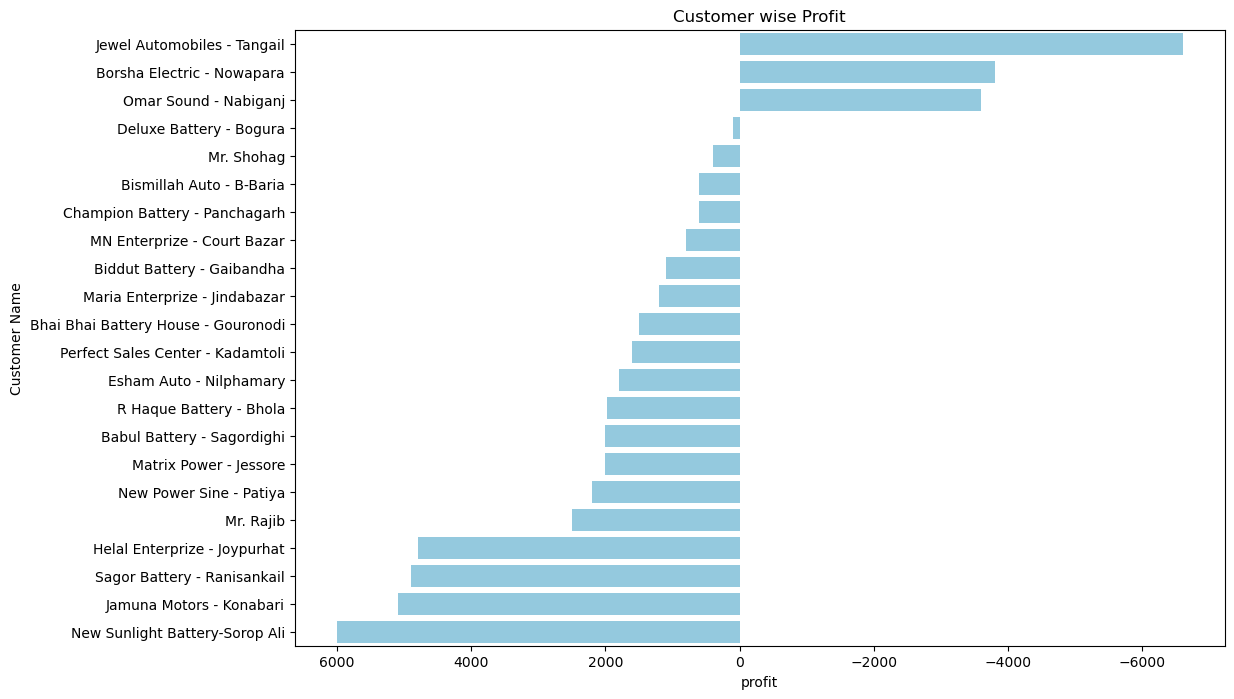

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(data=total_vs_profit, x="profit", y="customar_name", color="skyblue")
plt.xlabel("profit")
plt.ylabel("Customer Name")
plt.title("Customer wise Profit")
plt.gca().invert_xaxis()
plt.show()

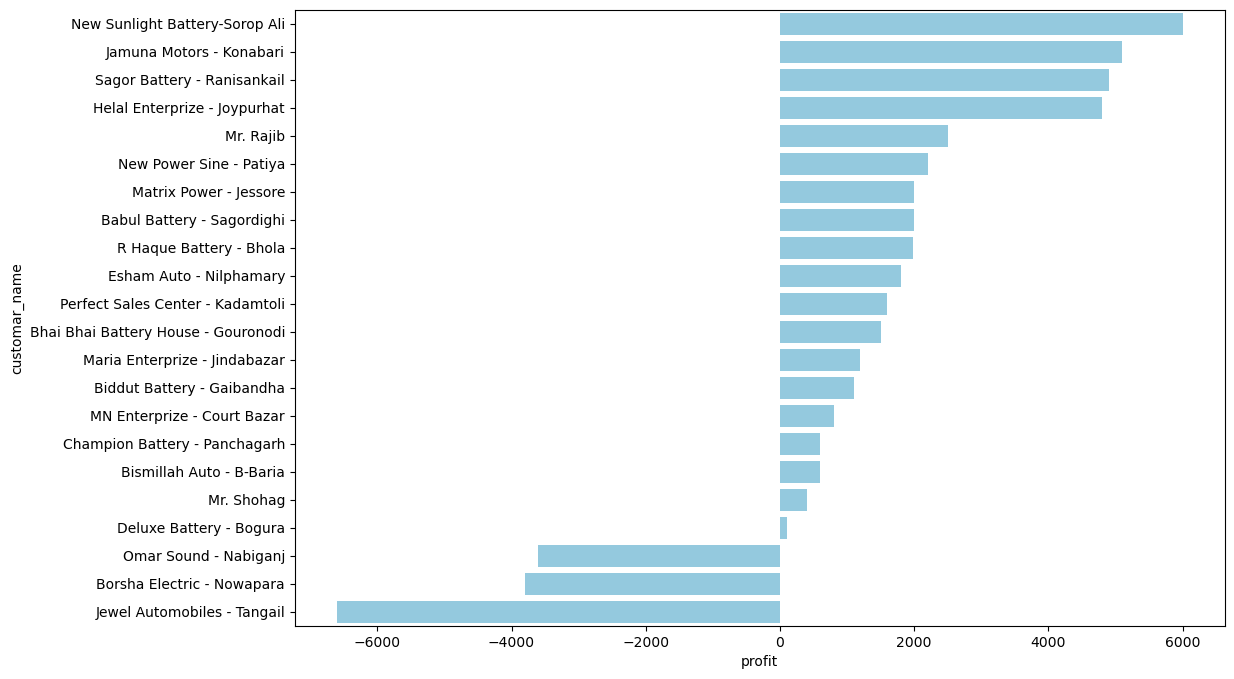

In [49]:
plt.figure(figsize=(12, 8))
sns.barplot(data=total_vs_profit, x='profit', y='customar_name', color='skyblue')
# plt.xlabel('Profit')
# plt.ylabel('Customer')
# plt.title('Customer-wise Profit')
plt.gca().invert_yaxis()  # Invert y-axis to display negative values at the top
plt.show()

In [50]:
district_based_sells = df.groupby("address",as_index=False)["total_amount"].sum().sort_values(by="total_amount")

<function matplotlib.pyplot.show(close=None, block=None)>

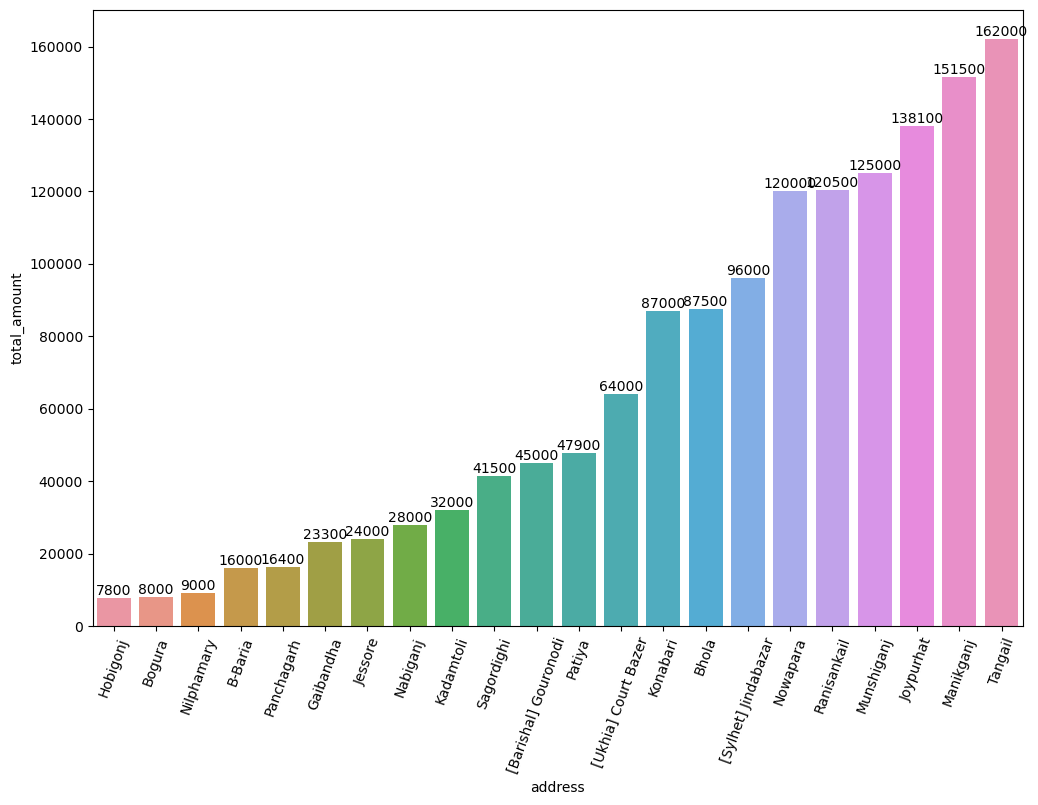

In [51]:
plt.figure(figsize=(12,8))
geo = sns.barplot(data=district_based_sells,
            x="address",
            y="total_amount",
            
            )
plt.xticks(rotation=70)
geo.bar_label(geo.containers[0])

plt.show


In [52]:
df[["address"]].value_counts() 

address             
Konabari                8
Ranisankail             7
Manikganj               6
Tangail                 5
Joypurhat               5
Bhola                   5
[Barishal] Gouronodi    4
Nowapara                4
Patiya                  3
[Sylhet] Jindabazar     3
Gaibandha               3
[Ukhia] Court Bazer     2
Sagordighi              2
Munshiganj              2
B-Baria                 1
Panchagarh              1
Nilphamary              1
Kadamtoli               1
Jessore                 1
Hobigonj                1
Bogura                  1
Nabiganj                1
Name: count, dtype: int64

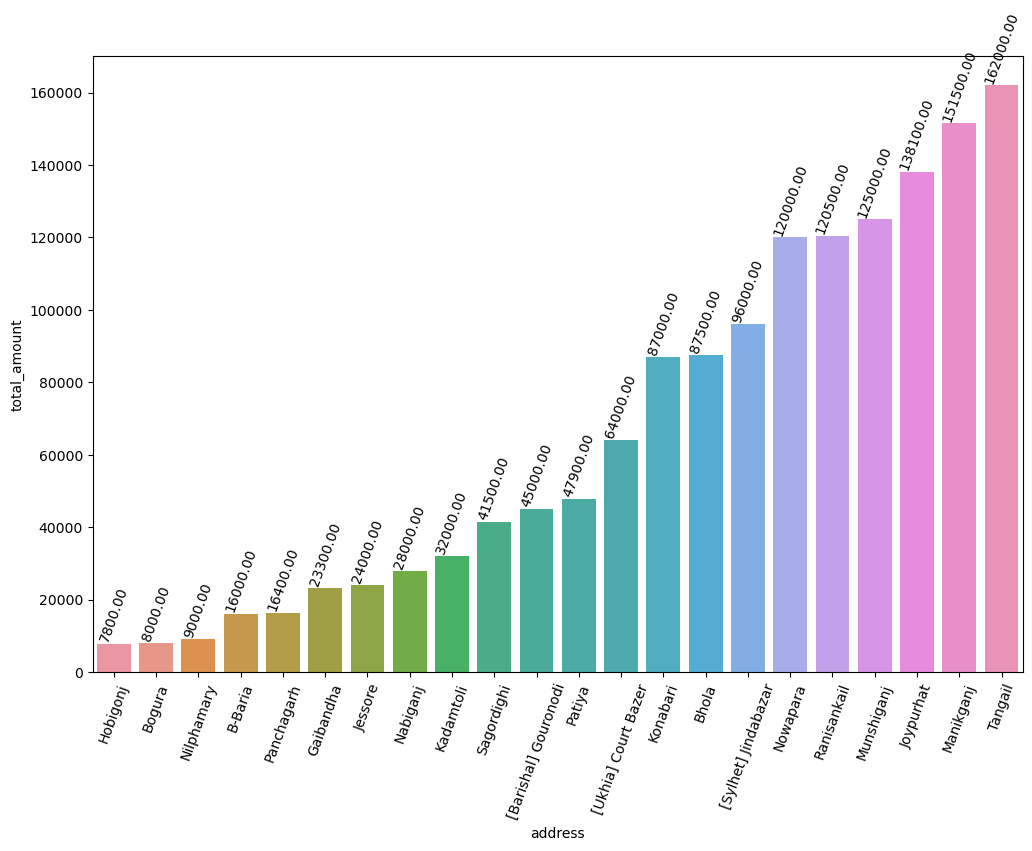

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
geo = sns.barplot(data=district_based_sells,
                  x="address",
                  y="total_amount")

plt.xticks(rotation=70)

# Adding labels to the bars with rotation
for bar in geo.patches:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height(),
             f"{bar.get_height():.2f}",
             ha='center',
             va='bottom',
             rotation=70)  # Rotating the text

plt.show()


In [58]:
df.head()

,inv_no,invoice_date,customar_name,address,contact_no,product,qty,per_pcs_rate,total_amount,payment_amount,payment_method,purchase_rate,sales_(ex._discount),profit,product_serial
0,PUS-22892024-01,2024-01-10,Maria Enterprize - Jindabazar,[Sylhet] Jindabazar,1718131018,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,8000,32000,21400,DBBL-Dania,7900,8000,400,"1118876, 1034393, 1036229, 1123726, 1183199"
1,PUS-22902024-01,2024-01-11,Esham Auto - Nilphamary,Nilphamary,1784072526,Microtek Merlyn 850/12V IPS+UPS,1,9000,9000,0,NaN,7200,9000,1800,81189
2,PUS-22912024-01,2024-01-13,Maria Enterprize - Jindabazar,[Sylhet] Jindabazar,1718131018,Luminous Eco Watt Neo 1050/12V IPS+UPS,4,8000,32000,0,NaN,7900,8000,400,"1083687, 1145421, 1027632, 1884892"
3,PUS-22922024-01,2024-01-14,Mr. Rajib,Munshiganj,1913774779,Luminous Eco Watt Neo 700/12V IPS+UPS,3,7000,21000,125000,Cash,6600,7000,1200,"1077962, 1286210, 1022291"
4,PUS-22922024-01,2024-01-14,Mr. Rajib,Munshiganj,1913774779,Luminous Eco Watt Neo 1050/12V IPS+UPS,13,8000,104000,125000,Cash,7900,8000,1300,"1285770, 1009580, 1194523, 1117274, 1408743, 1..."


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   inv_no                67 non-null     object
 1   invoice_date          67 non-null     object
 2   customar_name         67 non-null     object
 3   address               67 non-null     object
 4   contact_no            67 non-null     int64 
 5   product               67 non-null     object
 6   qty                   67 non-null     int64 
 7   per_pcs_rate          67 non-null     int32 
 8   total_amount          67 non-null     int32 
 9   payment_amount        67 non-null     int32 
 10  payment_method        4 non-null      object
 11  purchase_rate         67 non-null     int32 
 12  sales_(ex._discount)  67 non-null     int32 
 13  profit                67 non-null     int32 
 14  product_serial        67 non-null     object
dtypes: int32(6), int64(2), object(7)
memory us

In [ ]:
daily_sales = df.groupby(df['invoice_date'].dt.date,as_index=False)["total_amount"].sum()
daily_sales

In [70]:
df['just_date'] = df['invoice_date'].dt.date

AttributeError: Can only use .dt accessor with datetimelike values

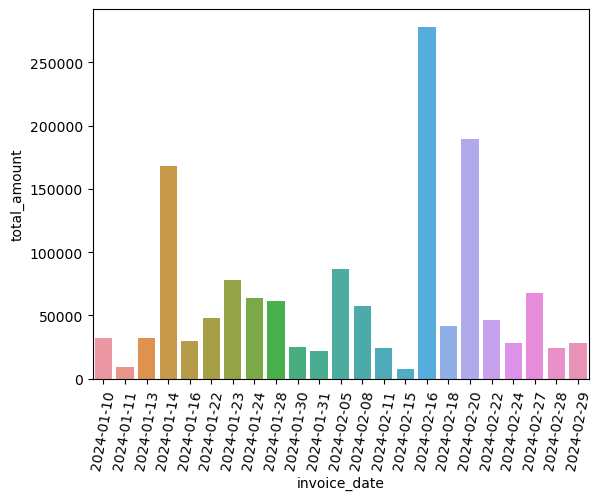

In [68]:
sns.barplot(data=daily_sales,
            x="invoice_date",
            y="total_amount")
plt.xticks(rotation=80)
plt.show()

In [55]:
import pygwalker as pyg




In [56]:
# ??pyg.walk

In [57]:
pyg.walk(df)

Box(children=(HTML(value='<div id="ifr-pyg-000615f3c839c6e81ZJYbrDilRSIkBTU" style="height: auto">\n    <head>…

In [ ]:
pd.DataFrame